In [48]:
import os
import base64
from azure.core.credentials import AzureKeyCredential
from azure.ai.documentintelligence import DocumentIntelligenceClient
from azure.ai.documentintelligence.models import AnalyzeDocumentRequest
from PIL import Image
import matplotlib.pyplot as plt
import json


In [2]:


endpoint = "https://kiostudacyityproj.cognitiveservices.azure.com/"
key = "Aio0YVpjyTmVFBT8HD1g0OzISVI13MM6Yv5HJR2DPVSwU6bvybSXJQQJ99BBACYeBjFXJ3w3AAALACOG1kFy"

In [3]:

document_intelligence_client  = DocumentIntelligenceClient(
    endpoint=endpoint, credential=AzureKeyCredential(key)
)


In [14]:
def encode_local_file(filepath):
    with open(filepath, "rb") as f:
        return base64.b64encode(f.read()).decode("utf-8")

In [31]:
def display_image(image_path):
    with Image.open(image_path) as img:
        plt.imshow(img)
        plt.show()

In [46]:
def read_id(file_path):
    out_dict = {}
    try:
        poller = document_intelligence_client.begin_analyze_document("prebuilt-idDocument", AnalyzeDocumentRequest(bytes_source=encode_local_file(file_path)))
        output = poller.result()
        fields = output.documents[0].fields
        out_dict["FirstName"] = fields['FirstName']['valueString']
        out_dict["LastName"] = fields['LastName']['valueString']
        out_dict["DateOfBirth"] = fields['DateOfBirth']['valueDate']
        out_dict["Sex"] = fields['Sex']['valueString']
    except Exception as e:
        print(f"Error parsing fields in {file_path}: {e}")

    return  out_dict








In [33]:
id_files = ["../material_preparation_step/" + f for f in os.listdir("../material_preparation_step/") if f.endswith('png')]


{'FirstName': 'James', 'LastName': 'Webb', 'DateOfBirth': '1970-12-15', 'Sex': 'M'}


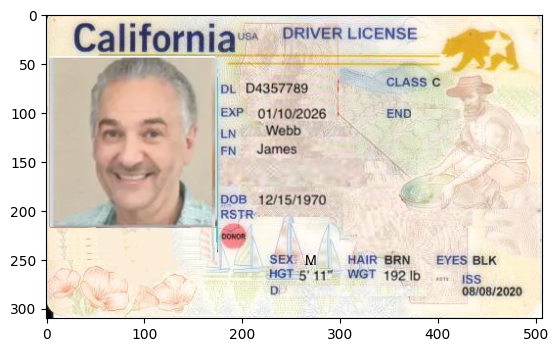

{'FirstName': 'James', 'LastName': 'Jackson', 'DateOfBirth': '1956-10-12', 'Sex': 'M'}


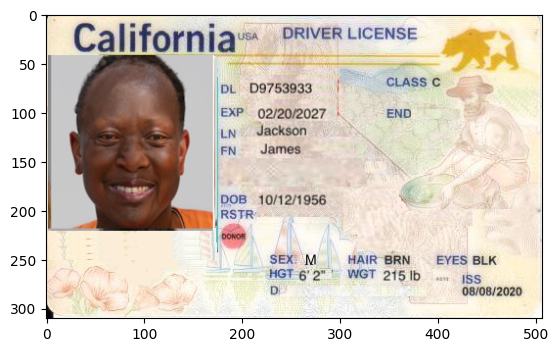

{'FirstName': 'Radha', 'LastName': 'S Kumar', 'DateOfBirth': '1994-03-05', 'Sex': 'F'}


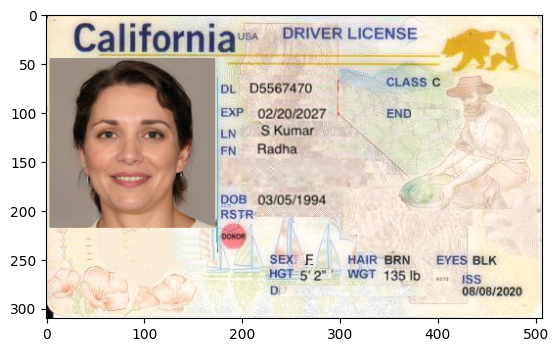

Error parsing fields in ../material_preparation_step/ca-dl-libby-herold.png> e
{'FirstName': 'Libby', 'LastName': 'Herold', 'DateOfBirth': '1996-02-10'}


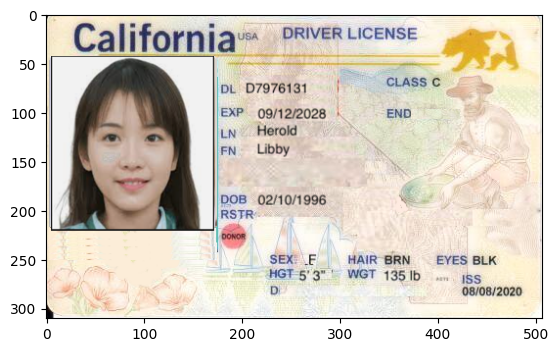

{'FirstName': 'AVKASH CHAUHAN', 'LastName': 'CHAUHAN', 'DateOfBirth': '1990-01-01', 'Sex': 'M'}


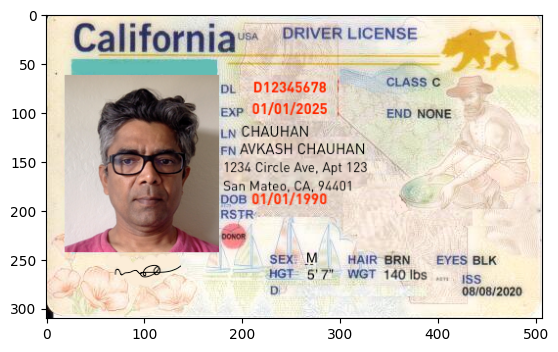

{'FirstName': 'Sameer', 'LastName': 'Kumar', 'DateOfBirth': '1990-01-25', 'Sex': 'M'}


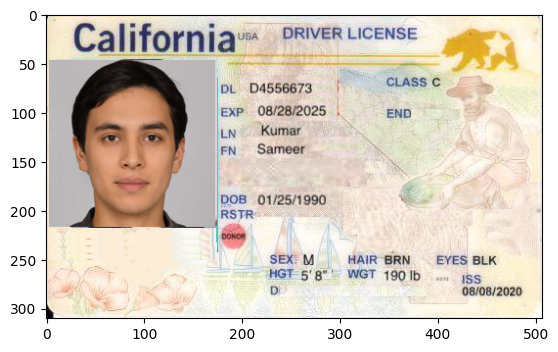

In [47]:
all_data = []

for id_file in id_files:
    id_data = read_id(id_file)
    print(id_data)
    display_image(id_file)
    all_data.append(id_data)

In [50]:
with open('id_info.json', 'w') as file:
    json.dump(all_data, file)